In [1]:
import nltk
import docx
import numpy as np
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
def read_document(filepath):
    doc = docx.Document(filepath)
    #Merged paragraphs into a single text
    text = ""
    for i in doc.paragraphs:
        text += " "+ i.text
    return text

In [3]:
#Tokenizez the words in the text
def tokenize_words(text):
    return nltk.word_tokenize(text)

In [4]:
#Checking for alpha numeric words
def check_alphanumberic_words(tokens):
    return [word for word in tokens if word.isalpha()]

In [5]:
#Stemming words
def apply_stemmer(words):
    porter = PorterStemmer()
    return [porter.stem(word) for word in words]

In [6]:
def plot_frequency_distribution(stemmed_words):
    english_stop_words= stopwords.words('english')
    clean_tokens = stemmed_words[:]
    for token in stemmed_words:
        if token in english_stop_words:
            clean_tokens.remove(token)

    freq = nltk.FreqDist(clean_tokens)
    freq.plot(20, cumulative=False)

In [7]:
arr_stemmed_doc = []
index_arr = []

In [8]:
def add_documents(stemmed, name):
    index_arr.append(name)
    arr_stemmed_doc.append(" ".join(stemmed))

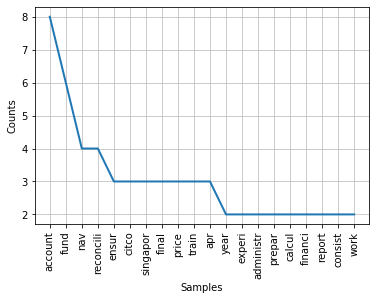

In [9]:
#Read document
text = read_document('Resume/1Amy.docx')
tokens = tokenize_words(text)
words = check_alphanumberic_words(tokens)
stemmed = apply_stemmer(words)
add_documents(stemmed, "1Amy.docx")
#Plotting frequency distribution of the words in the text
plot_frequency_distribution(stemmed)

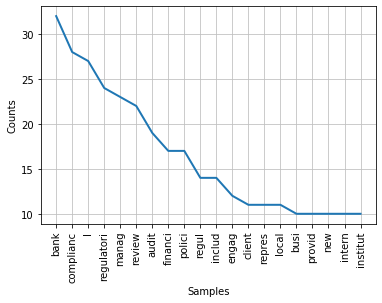

In [10]:
#Read document
text = read_document('Resume/Bank of East Asia_Tracey Teo_Compliance Head.docx')
tokens = tokenize_words(text)
words = check_alphanumberic_words(tokens)
stemmed = apply_stemmer(words)

add_documents(stemmed, "Bank of East Asia_Tracey Teo_Compliance Head.docx")
#Plotting frequency distribution of the words in the text
plot_frequency_distribution(stemmed)

In [11]:
#Checking the output based on input of the text
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document vector space Matrix
count_vectorizer = CountVectorizer()

#Sample query
text2 = read_document('Job Description/CDL - EVP Head of Asset Mgt.docx')
# text2 = "accountant"
tokens2 = tokenize_words(text2)
words2 = check_alphanumberic_words(tokens2)
stemmed2 = apply_stemmer(words2)
add_documents(stemmed2, "JD 1")

text3 = "bank"
tokens3 = tokenize_words(text3)
words3 = check_alphanumberic_words(tokens3)
stemmed3 = apply_stemmer(words3)
add_documents(stemmed3, "Test 2")

sparse_matrix = count_vectorizer.fit_transform(arr_stemmed_doc)
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=index_arr)

In [12]:
#Vector space matrix
df

,ab,abil,abl,abreast,acca,accord,account,accpac,accredit,accrual,...,will,with,within,wolf,word,work,world,written,year,youngest
1Amy.docx,0,0,0,0,0,0,8,1,0,1,...,0,6,0,0,1,2,1,1,2,0
Bank of East Asia_Tracey Teo_Compliance Head.docx,1,0,0,1,1,2,2,0,1,0,...,0,23,2,1,0,7,0,0,4,1
JD 1,0,1,1,0,0,0,0,0,0,0,...,1,5,0,0,0,1,0,1,2,0
Test 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))


[[1.         0.65562839 0.64424811 0.02637981]
 [0.65562839 1.         0.68477014 0.14733408]
 [0.64424811 0.68477014 1.         0.        ]
 [0.02637981 0.14733408 0.         1.        ]]
